In [28]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"



In [29]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

In [30]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [31]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')


Found 224 images belonging to 2 classes.


In [32]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [33]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [34]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 54, 54, 64)       

In [36]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

Epoch 1/10
8/8 [==============================] - 26s 3s/step - loss: 0.9863 - accuracy: 0.5859 - val_loss: 0.6555 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 24s 3s/step - loss: 0.5481 - accuracy: 0.7500 - val_loss: 0.3484 - val_accuracy: 0.9333
Epoch 3/10
8/8 [==============================] - 36s 5s/step - loss: 0.4611 - accuracy: 0.8164 - val_loss: 0.5217 - val_accuracy: 0.9500
Epoch 4/10
8/8 [==============================] - 31s 4s/step - loss: 0.3540 - accuracy: 0.8555 - val_loss: 0.2164 - val_accuracy: 0.9500
Epoch 5/10
8/8 [==============================] - 26s 3s/step - loss: 0.2887 - accuracy: 0.8828 - val_loss: 0.3474 - val_accuracy: 0.9500
Epoch 6/10
8/8 [==============================] - 31s 4s/step - loss: 0.2385 - accuracy: 0.9219 - val_loss: 0.1286 - val_accuracy: 0.9667
Epoch 7/10
8/8 [==============================] - 25s 3s/step - loss: 0.2110 - accuracy: 0.9219 - val_loss: 0.1123 - val_accuracy: 0.9667
Epoch 8/10
8/8 [==================

In [37]:
model.save('covid.h5')

In [38]:
model.evaluate_generator(train_generator)

[0.055683430284261703, 0.9732142686843872]

In [39]:
model.evaluate_generator(validation_generator)

[0.07454045861959457, 0.9666666388511658]

In [40]:
y_actual = []
y_test = []

In [41]:
import os
for i in os.listdir("./CovidDataset/Val/Normal/"):
    img = image.load_img("./CovidDataset/Val/Normal/"+i, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(1)
    


In [42]:
import os
for i in os.listdir("./CovidDataset/Val/Covid/"):
    img = image.load_img("./CovidDataset/Val/Covid/"+i, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(0)

In [43]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [45]:
cm = confusion_matrix(y_actual, y_test)

In [46]:
confusion_matrix(y_actual, y_test)

array([[30,  0],
       [ 2, 28]])

In [47]:
print("Classification report:",classification_report(y_actual, y_test))

Classification report:               precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.93      0.97        30

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



In [48]:
import seaborn as sns

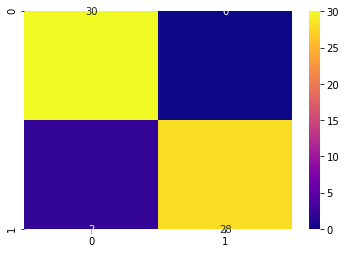

In [49]:
sns.heatmap(cm, cmap = "plasma", annot=True)